# Predict Developer Salary

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Read the Data set
df = pd.read_csv("./dev_salary_messy.csv")
df.head()

,age,gender,company,designation,skills,experience,salary
0,30.0,Male,NaN,Full Stack Developer,"HTML,CSS,JS",8.0,40000.0
1,40.0,Female,StartupX,Data Scientist,"Python,React",8.0,100000.0
2,NaN,Female,StartupX,Full Stack Developer,"Java,Spring",15.0,100000.0
3,23.0,Other,TechNova,NaN,"Node,Express",15.0,150000.0
4,40.0,Other,StartupX,Data Scientist,NaN,8.0,NaN


In [39]:
# Understand the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          170 non-null    float64
 1   gender       144 non-null    object 
 2   company      166 non-null    object 
 3   designation  160 non-null    object 
 4   skills       177 non-null    object 
 5   experience   190 non-null    float64
 6   salary       179 non-null    float64
dtypes: float64(3), object(4)
memory usage: 11.6+ KB


In [40]:
df.describe()

,age,experience,salary
count,170.000000,190.000000,179.000000
mean,30.052941,6.763158,92737.430168
std,5.486144,4.831741,37127.071441
min,23.000000,1.000000,40000.000000
25%,25.000000,2.000000,60000.000000
50%,30.000000,5.000000,100000.000000
75%,35.000000,10.000000,120000.000000
max,40.000000,15.000000,150000.000000


### EDA

In [41]:
# first check the null values
total_null = df.isnull().sum()
total_null

age            40
gender         66
company        44
designation    50
skills         33
experience     20
salary         31
dtype: int64

In [42]:
# First fill out the age with median because if the age have outliers the median ignore it ,
age_median = df["age"].median()
df["age"] = df["age"].fillna(age_median)

# now fill all values of gender with mode
gender_mode = df["gender"].mode()
df["gender"] = df["gender"].fillna(gender_mode[0])

# now fill out the company with mode data
company_mode = df["company"].mode()
df["company"] = df["company"].fillna(company_mode[0])

# now fill out the designation with mode values
df["designation"] = df["designation"].fillna(df["designation"].mode()[0])


# fill skill values with python
df["skills"] = df["skills"].fillna("Python")


# fill experience with median
df["experience"] = df["experience"].fillna(df["experience"].median())


# need to predict the salary so drop salary row having null values
df = df.dropna(subset="salary")


# first check the null values
total_null = df.isnull().sum()
total_null


age            0
gender         0
company        0
designation    0
skills         0
experience     0
salary         0
dtype: int64

In [43]:
# now check the duplicates
total_duplicates = df.duplicated().sum()
total_duplicates 

np.int64(9)

In [44]:
# remove all duplicates
df = df.drop_duplicates()
total_duplicates = df.duplicated().sum()
total_duplicates 

np.int64(0)

In [45]:
df['gender'] = df['gender'].str.lower().str.strip()
df['company'] = df['company'].str.title().str.strip()
df['designation'] = df['designation'].str.title().str.strip()
df['skills'] = df['skills'].str.lower().str.strip().str.replace(";", ",")


## Exploratory Data Analysis

<Axes: xlabel='salary', ylabel='Count'>

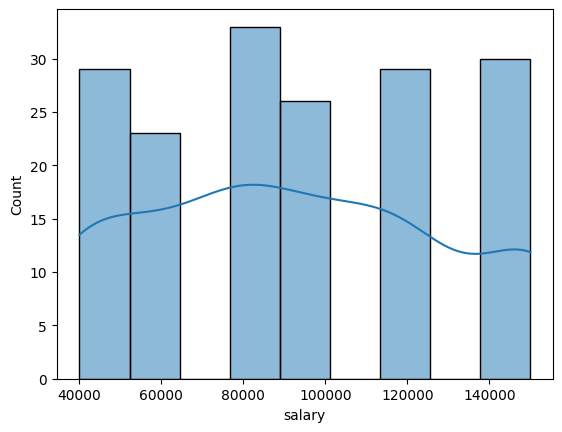

In [46]:
# Now check how the salary is Distribution
sns.histplot(df["salary"], kde=True)

<Axes: xlabel='experience', ylabel='salary'>

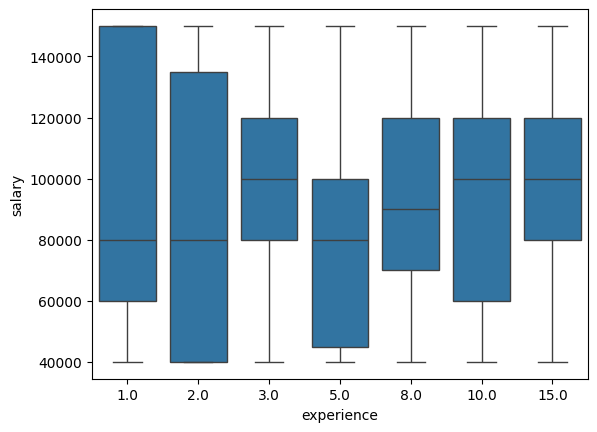

In [47]:
# check the distribution salary with experience
sns.boxplot(df , x="experience",y="salary")

<Axes: xlabel='gender', ylabel='salary'>

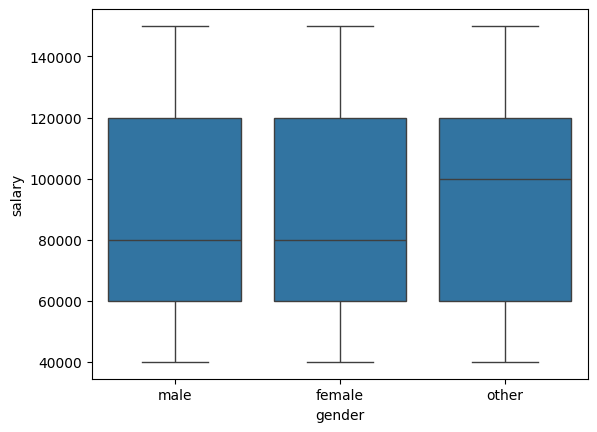

In [48]:
sns.boxplot(x='gender', y='salary', data=df)

<Axes: xlabel='age', ylabel='salary'>

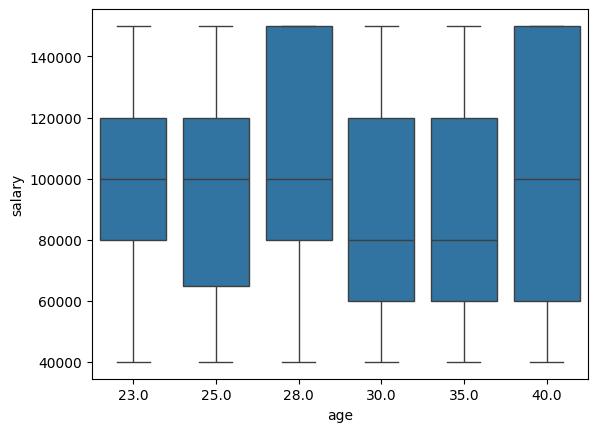

In [49]:
sns.boxplot(x='age', y='salary', data=df)

<Axes: xlabel='company', ylabel='salary'>

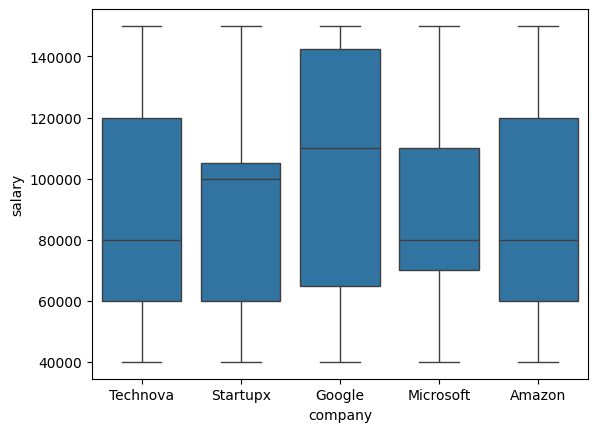

In [50]:
sns.boxplot(x='company', y='salary', data=df)


([0, 1, 2, 3],
 [Text(0, 0, 'Full Stack Developer'),
  Text(1, 0, 'Data Scientist'),
  Text(2, 0, 'Backend Developer'),
  Text(3, 0, 'Frontend Developer')])

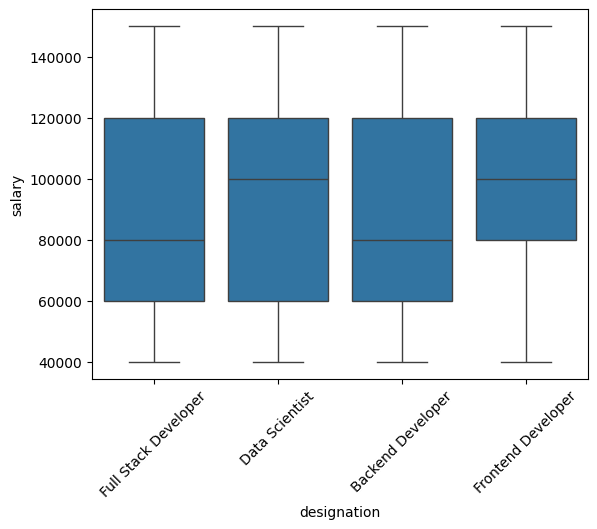

In [53]:
sns.boxplot(x='designation', y='salary', data=df)
plt.xticks(rotation=45)


In [54]:
# correlation heat map
sns.heatmap(df.corr(), annot=True , cmap='coolwarm')

ValueError: could not convert string to float: 'html,css,js'